# Linear Regression 선형 회귀

선형 회귀는 한 개 이상의 독립 변수 
x와 y의 선형 관계를 모델링한다. 

만약, 독립 변수 x가 1개라면 단순 선형 회귀라고 한다.

## Simple Linear Regressoin Analysis 단순 선형 회귀 분석



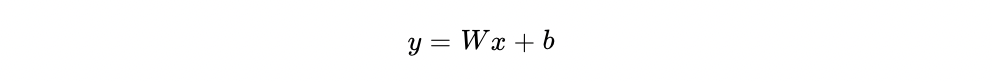

독립 변수 x와 곱해지는 값 W를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)이라고 다. 

직선의 방정식에서는 각각 직선의 기울기와 절편을 의미한다.

## Multiple Linear Regression Analysis 다중 선형 회귀 분석

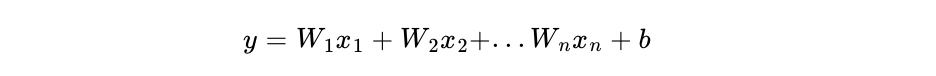

# Hypothesis 가설 세우기 

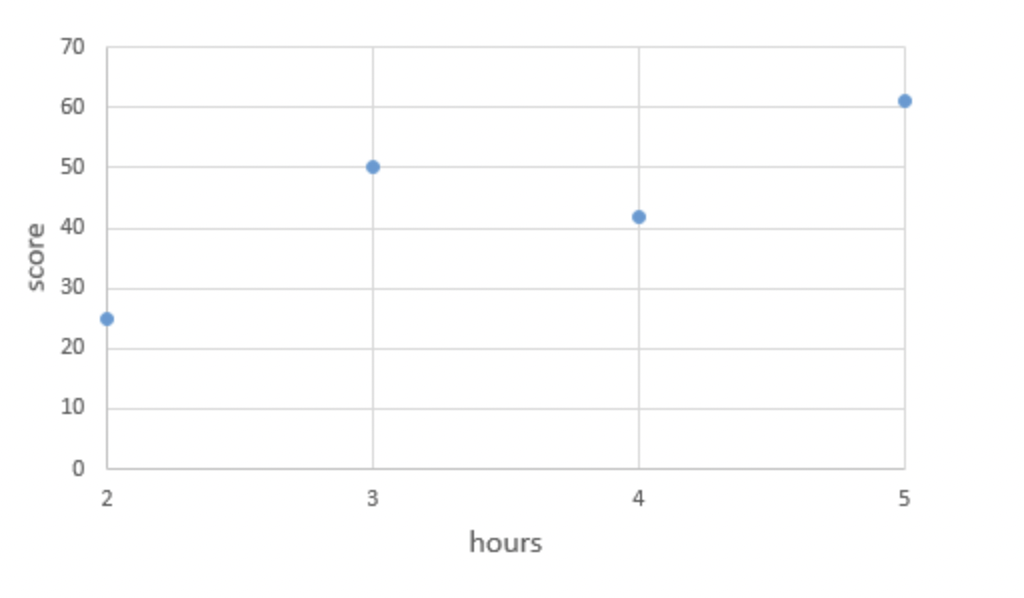

알고있는 데이터로부터 x와 y의 관계를 유추하고, 이 학생이 6시간, 7시간, 8시간을 공부하였을 때의 성적을 예측해보자. 

x와 y의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 가설(Hypothesis)이라고 한다.

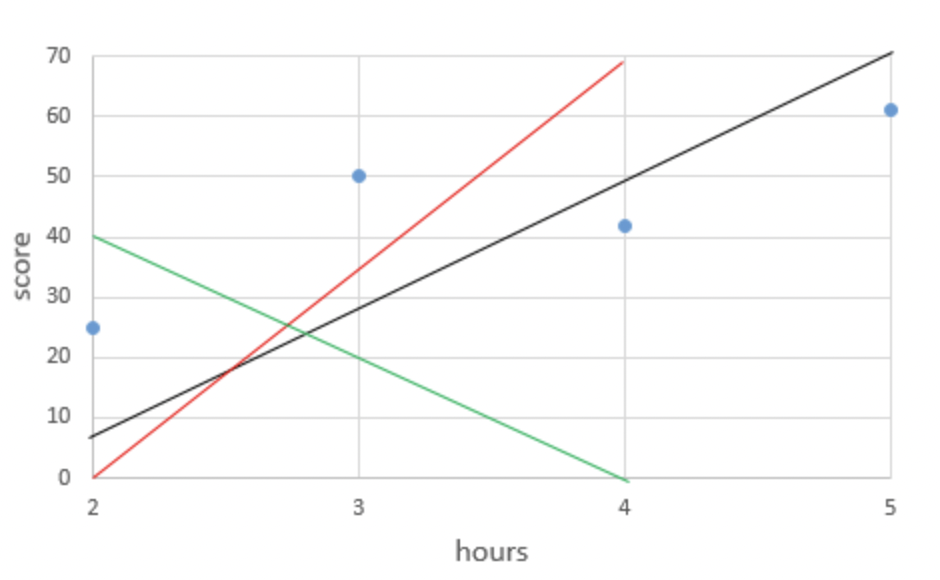

주어진 데이터에서 x와 y의 관계를 W와 b를 이용하여 식을 세우는 일을 가설이라고 한다. 

문제에 대한 규칙을 가장 잘 표현하는 W와 b를 찾아야 한다. 

머신 러닝은 W와 b를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 W와 b를 찾아내는 것이다.

이 때 실제값과 예측값에 대한 오차에 대한 식을 목적 함수(Objective function) 또는 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 한다. 

함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수를 목적 함수(Objective function)라고 한다. 

그리고 값을 최소화하려고 하면 이를 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 한다.

# Cost function 비용 함수 : MSE 평균 제곱 오차

비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식이어야 한다. 

회귀 문제의 경우에는 주로 평균 제곱 오차(Mean Squared Error, MSE)가 사용된다.

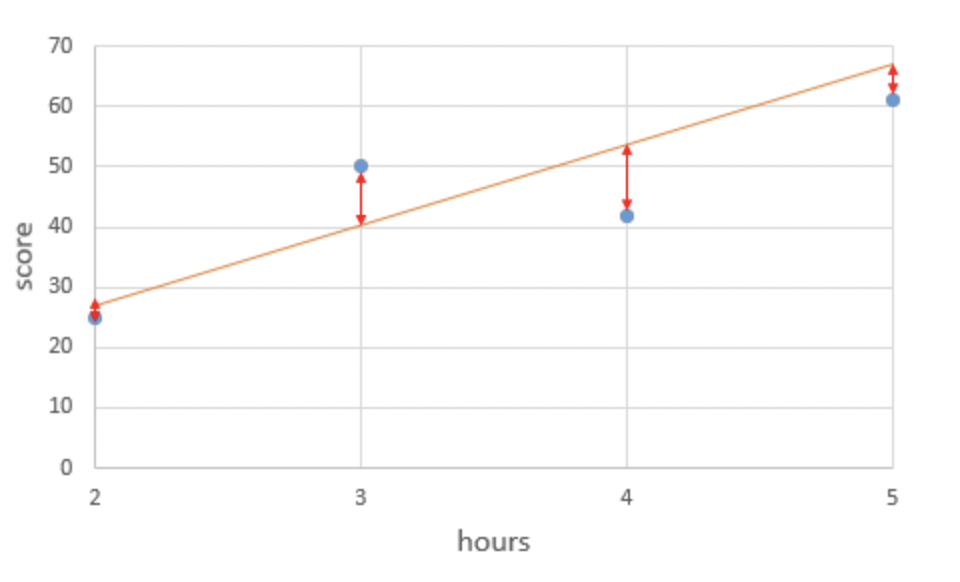

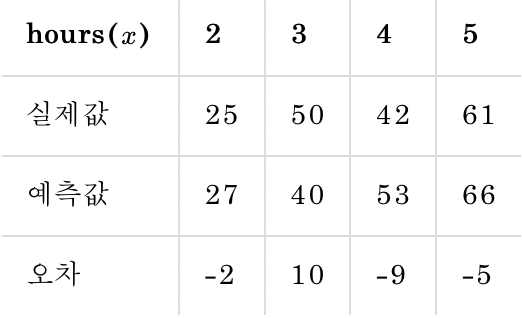

수식적으로 단순히 '오차 = 실제값 - 예측값' 이라고 정의한 후에 모든 오차를 더하면 음수 오차도 있고, 양수 오차도 있으므로 오차의 절대적인 크기를 구할 수가 없다. 

그래서 모든 오차를 제곱하여 더하는 방법을 사용한다.

즉, 위의 그림에서의 모든 점과 직선 사이의 ↕ 거리를 제곱하고 모두 더한다. 여기서 n은 갖고 있는 데이터의 개수를 의미한다.

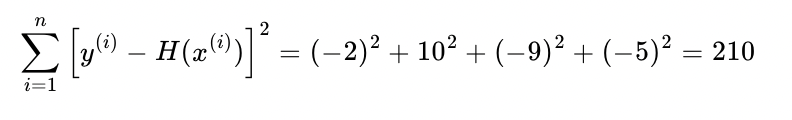

이때 데이터의 개수인 n으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squered Error, MSE)라고 한다.

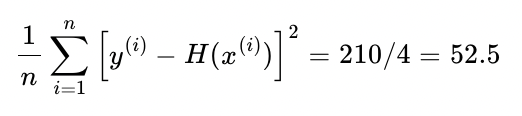


y = 13x + 1의 예측값과 실제값의 평균 제곱 오차의 값은 52.5이다. 

평균 제곱 오차의 값을 최소값으로 만드는 W와 b를 찾아내는 것이 정답인 직선을 찾아내는 것이다. 

평균 제곱 오차를 W와 b에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같다.

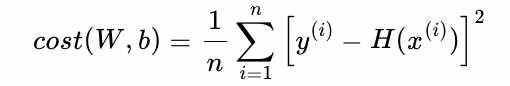


모든 점들과의 오차가 클 수록 평균 제곱 오차는 커지며, 오차가 작아질 수록 평균 제곱 오차는 작아진다. 

그러므로 이 평균 최곱 오차. 즉, Cost(W,b)를 최소가 되게 만드는 W와 b를 구하면 결과적으로 y와 x의 관계를 가장 잘 나타내는 직선을 그릴 수 있다.

# 자동 미분

선형 회귀를 텐서플로우와 케라스를 통해 구현해본다.

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

tape_gradient()는 자동 미분 기능을 수행한다. 임의로 식을 세워 w에 대해 미분한다.

gradients를 출력하면 w에 대해 미분한 값이 저장된 것을 확인할 수 있다.

In [3]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 자동 미분을 이용한 선형 회귀 구현

In [4]:
# 학습될 가중치 변수를 선언

W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [5]:
# 가설을 함수로서 정의

@tf.function
def hypothesis(x):
  return W*x + b

현재의 가설에서 W와 b는 각각 4와 1이므로 임의의 입력값을 넣었을 때의 결과는 다음과 같다.

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [7]:
# 평균 제곱 오차를 손실 함수로서 정의

@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [8]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [9]:
# 옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용

optimizer = tf.optimizers.SGD(0.01)

In [10]:
# 약 300번에 걸쳐서 경사 하강법을 수행

for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

W와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인 가능하다.

학습된 W와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해보자.

In [11]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


# Keras로 구현하는 선형 회귀

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [14]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 408.5513 - mse: 408.5513
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3565 - mse: 2.3565
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3485 - mse: 2.3485
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3409 - mse: 2.3409
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3336 - mse: 2.3336
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3265 - mse: 2.3265
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3198 - mse: 2.3198
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3134 - mse: 2.3134
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3072 - mse: 2.3072
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3012 - mse: 2.3012
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2

선택된 오차를 최소화하는 직선을 그래프로 그려보자.

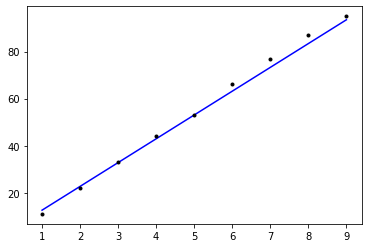

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 W와 b의 값을 가지는 직선이다. 

이제 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해보자. 

model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여준다.

In [16]:
print(model.predict([9.5]))

[[98.55646]]
